In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install ultralytics diffusers["torch"] transformers
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8x.pt
!git clone https://github.com/barnik321/zocket_assign.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-vbtl2f_l
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-vbtl2f_l
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 671.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.3/760.3 kB 5.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:0000:0100:01
--2024-05-23 17:12:19--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.34, 3.162.163.19, 3.162.163.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.34|:443... connected.
HTTP request sent, awaiting response... 

In [125]:
# !rm -r zocket_assign
# !git clone https://github.com/barnik321/zocket_assign.git

Cloning into 'zocket_assign'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 71 (delta 19), reused 63 (delta 13), pack-reused 0
Unpacking objects: 100% (71/71), 12.21 MiB | 12.94 MiB/s, done.


In [2]:
from pathlib import Path
import cv2
from matplotlib import pyplot as plt
import cv2, os, sys
import numpy as np
from PIL import Image, ImageOps
# from diffusers import StableDiffusionXLControlNetInpaintPipeline, DPMSolverMultistepScheduler, ControlNetModel, StableDiffusionXLInpaintPipeline
# import torch
# from ultralytics import YOLO
# from segment_anything import SamPredictor, sam_model_registry
# from typing import Optional, Union, List, Tuple

In [3]:
import sys; sys.path.append('zocket_assign')
from assign import Preprocessor, BGGenerator

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-05-23 17:13:19.625043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 17:13:19.625147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 17:13:19.918575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
images_root = Path('./zocket_assign/images')
images = sorted(os.listdir(images_root))
print(images)
images = [cv2.cvtColor(cv2.imread(str(images_root / i)), cv2.COLOR_BGR2RGB) for i in images]

['apple.jpg', 'car.png', 'chair.jpg', 'couch.jpg', 'suitcase.png']


OBJECTS - suitcase, car, chair, couch

NON-OBJECTS - apple

Text(0.5, 1.0, 'suitcase')

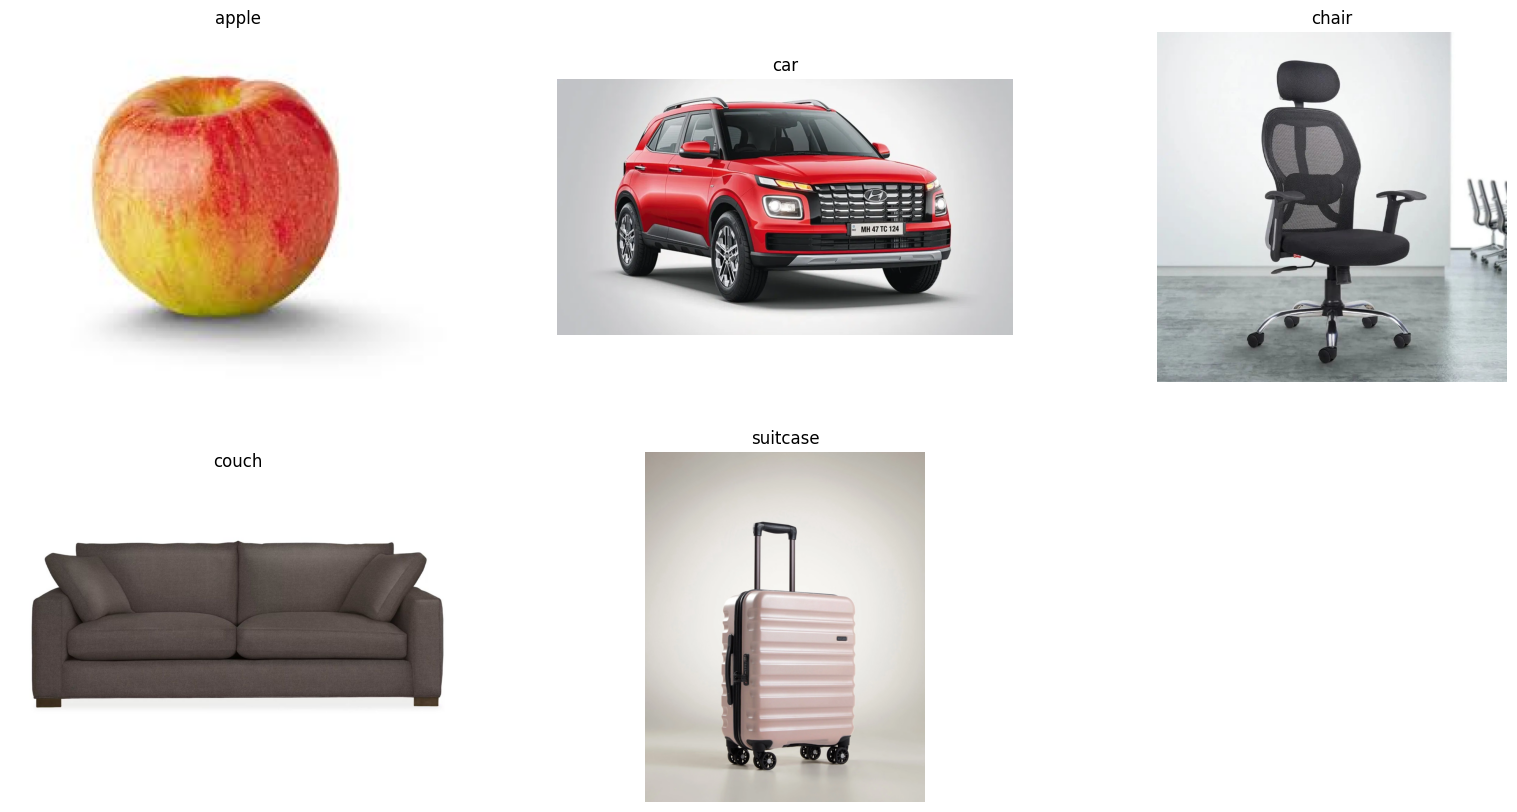

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(images[0])
plt.axis('off')
plt.title('apple')

plt.subplot(2, 3, 2)
plt.imshow(images[1])
plt.axis('off')
plt.title('car')

plt.subplot(2, 3, 3)
plt.imshow(images[2])
plt.axis('off')
plt.title('chair')

plt.subplot(2, 3, 4)
plt.imshow(images[3])
plt.axis('off')
plt.title('couch')

plt.subplot(2, 3, 5)
plt.imshow(images[4])
plt.axis('off')
plt.title('suitcase')

# Initialization

In [6]:
bggenerator = BGGenerator('cuda:0')
preprocessor = bggenerator._preprocessor

config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


# Product Recognition Filter


0: 384x640 1 car, 116.1ms
Speed: 28.8ms preprocess, 116.1ms inference, 834.1ms postprocess per image at shape (1, 3, 384, 640)
car


(-0.5, 1199.5, 671.5, -0.5)

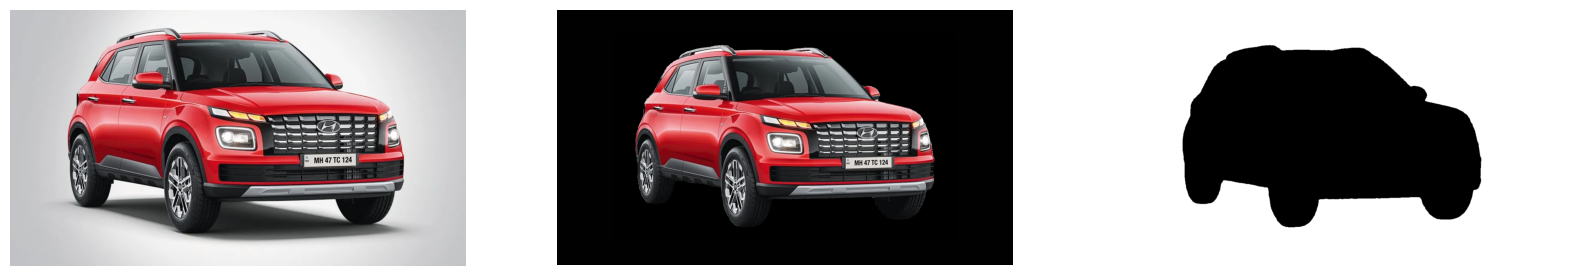

In [7]:
image = Image.fromarray(images[1])
k = preprocessor.preprocess(image, height=image.height, width=image.width)
print(k[4])

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.array(image).astype(np.uint8))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(k[1])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(k[2], cmap='gray')
plt.axis('off')


0: 640x640 3 chairs, 98.2ms
Speed: 4.6ms preprocess, 98.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
chair


(-0.5, 999.5, 999.5, -0.5)

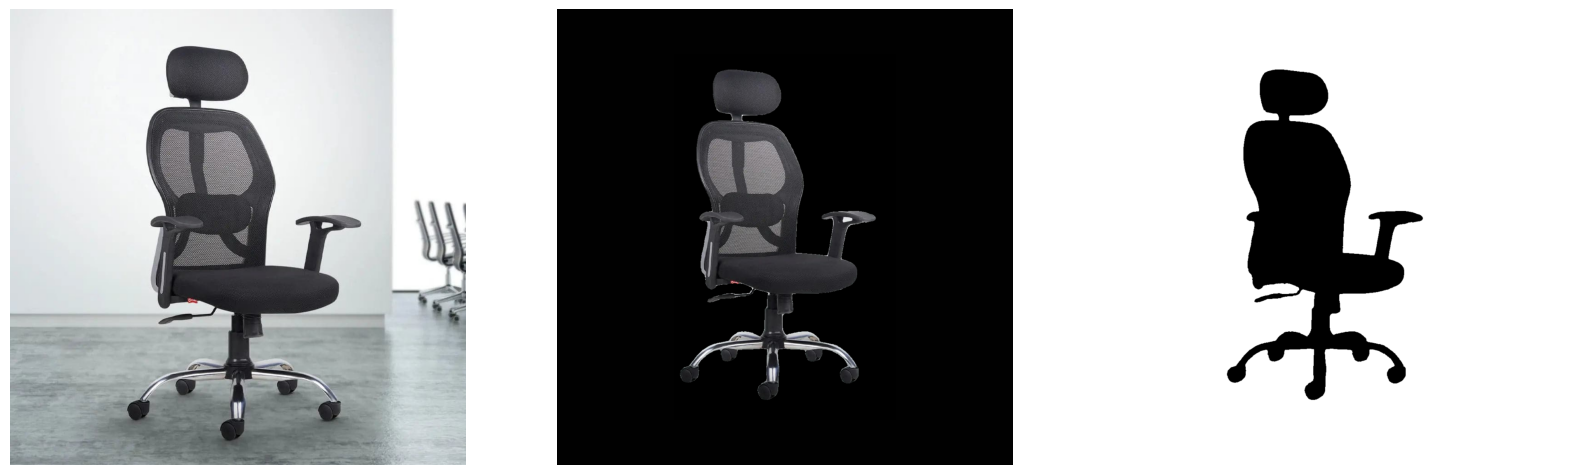

In [136]:
image = Image.fromarray(images[2])
k = preprocessor.preprocess(image, height=image.height, width=image.width)
print(k[4])

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.array(image).astype(np.uint8))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(k[1])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(k[2], cmap='gray')
plt.axis('off')


0: 448x640 1 couch, 73.6ms
Speed: 3.1ms preprocess, 73.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
couch


(-0.5, 1495.5, 999.5, -0.5)

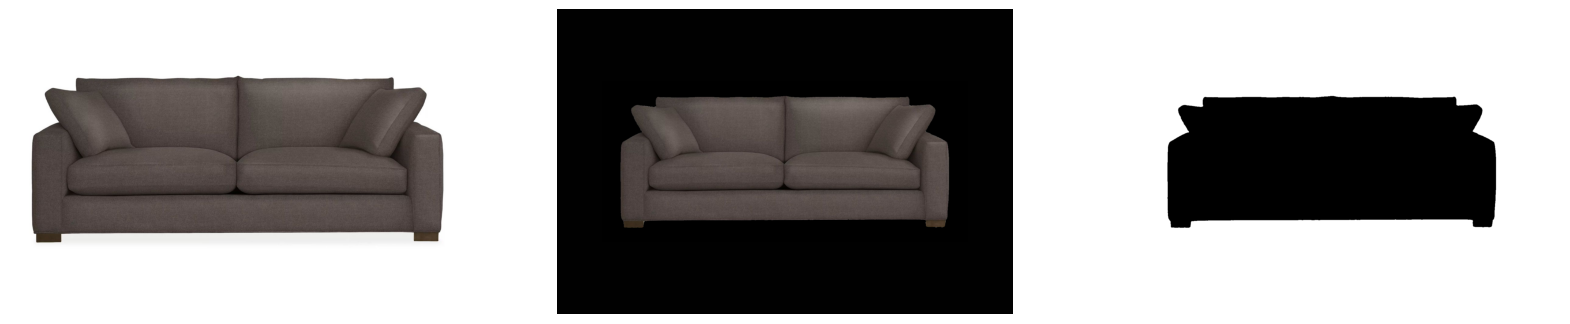

In [138]:
image = Image.fromarray(images[3])
k = preprocessor.preprocess(image, height=image.height, width=image.width)
print(k[4])

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.array(image).astype(np.uint8))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(k[1])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(k[2], cmap='gray')
plt.axis('off')


0: 640x512 1 suitcase, 75.0ms
Speed: 3.3ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)
suitcase


(-0.5, 1919.5, 2399.5, -0.5)

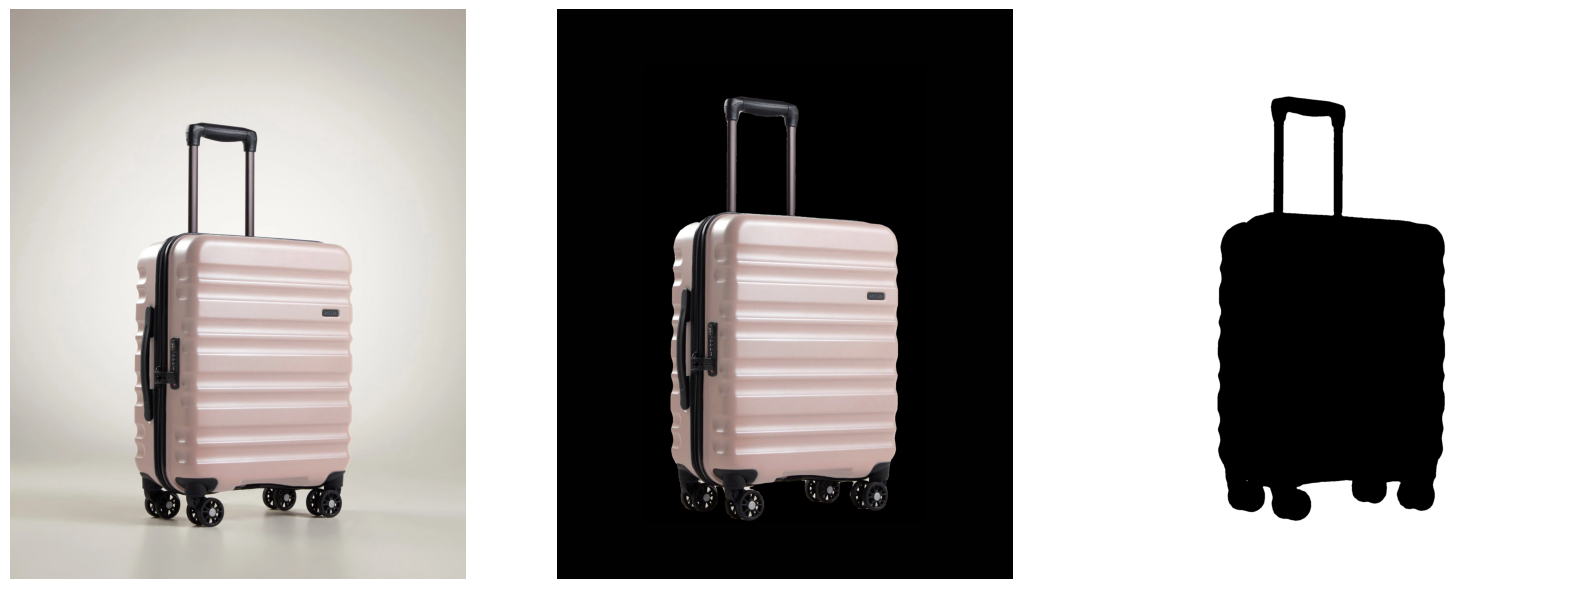

In [140]:
image = Image.fromarray(images[4])
k = preprocessor.preprocess(image, height=image.height, width=image.width)
print(k[4])

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.array(image).astype(np.uint8))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(k[1])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(k[2], cmap='gray')
plt.axis('off')


0: 512x640 1 apple, 75.1ms
Speed: 2.4ms preprocess, 75.1ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
None


(-0.5, 252.5, 198.5, -0.5)

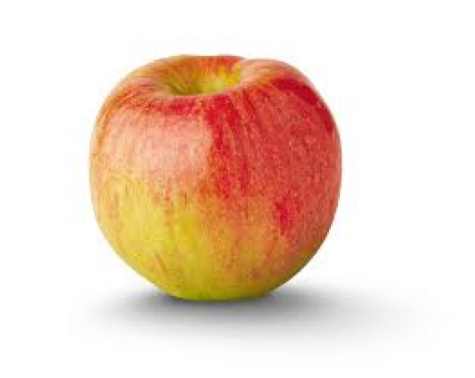

In [67]:
image = Image.fromarray(images[0])
k = preprocessor.preprocess(image, height=image.height, width=image.width)
print(k[4])

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(np.array(image).astype(np.uint8))
plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(k[1])
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(k[2], cmap='gray')
# plt.axis('off')

#  Generative AI for Visuals

In [131]:
image = Image.fromarray(images[1])
k = bggenerator.generate(prompt='road, distant mountains, commercial photography, professional, photorealistic', 
               image=image, height=1024, width=1024)


0: 384x640 1 car, 62.1ms
Speed: 4.3ms preprocess, 62.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
['car, road, distant mountains, commercial photography, professional, photorealistic', None, 20, 0.3, 1024, 1024, 1, 7.0, 1.0]


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'postprocessed generated image')

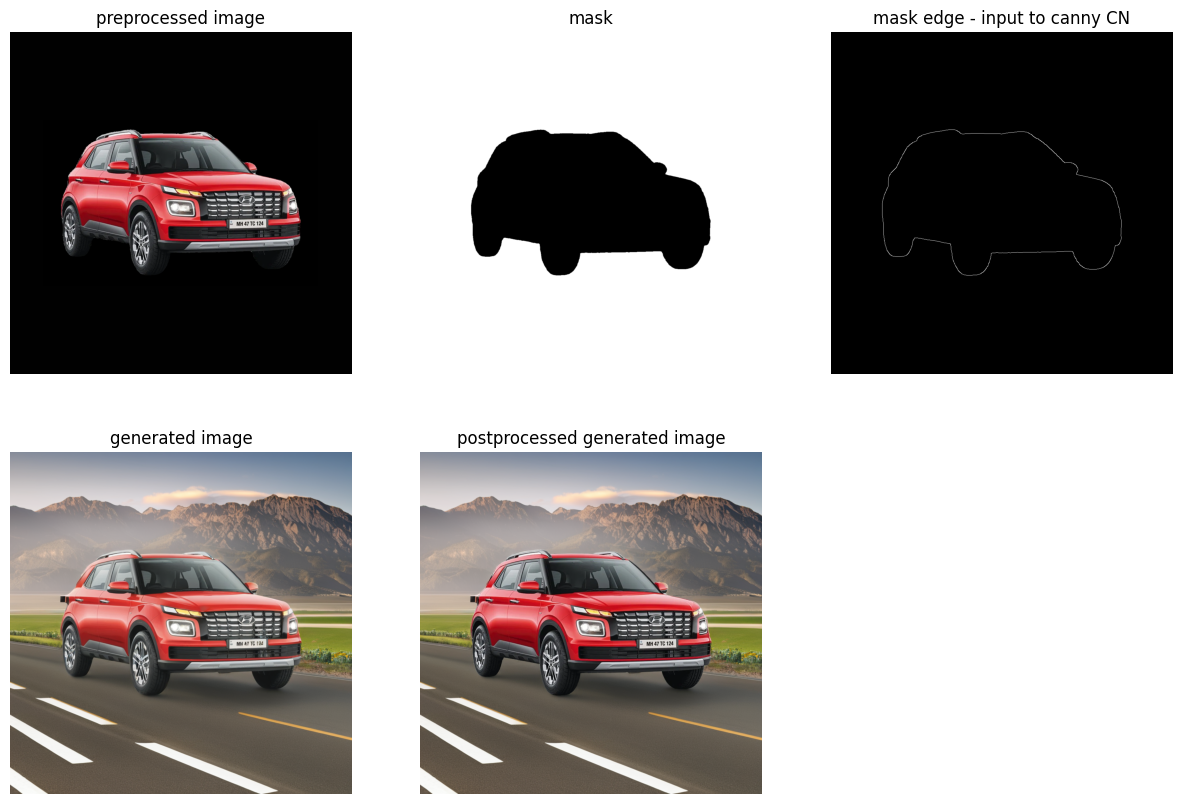

In [132]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(np.array(k[4]).astype(np.uint8))
plt.axis('off')
plt.title('preprocessed image')

plt.subplot(2, 3, 2)
plt.imshow(k[5], cmap='gray')
plt.axis('off')
plt.title('mask')

plt.subplot(2, 3, 3)
plt.imshow(k[6], cmap='gray')
plt.axis('off')
plt.title('mask edge - input to canny CN')

plt.subplot(2, 3, 4)
plt.imshow(k[1][0])
plt.axis('off')
plt.title('generated image')

plt.subplot(2, 3, 5)
plt.imshow(k[0][0])
plt.axis('off')
plt.title('postprocessed generated image')

In [120]:
image = Image.fromarray(images[2])
k = bggenerator.generate(prompt='room, floor, table, commercial photography, professional, photorealistic', 
               image=image, height=1024, width=1024)


0: 640x640 3 chairs, 100.3ms
Speed: 4.4ms preprocess, 100.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
['chair, room, floor, table, commercial photography, professional, photorealistic', None, 20, 0.3, 1024, 1024, 1, 7.0, 1.0]


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'postprocessed generated image')

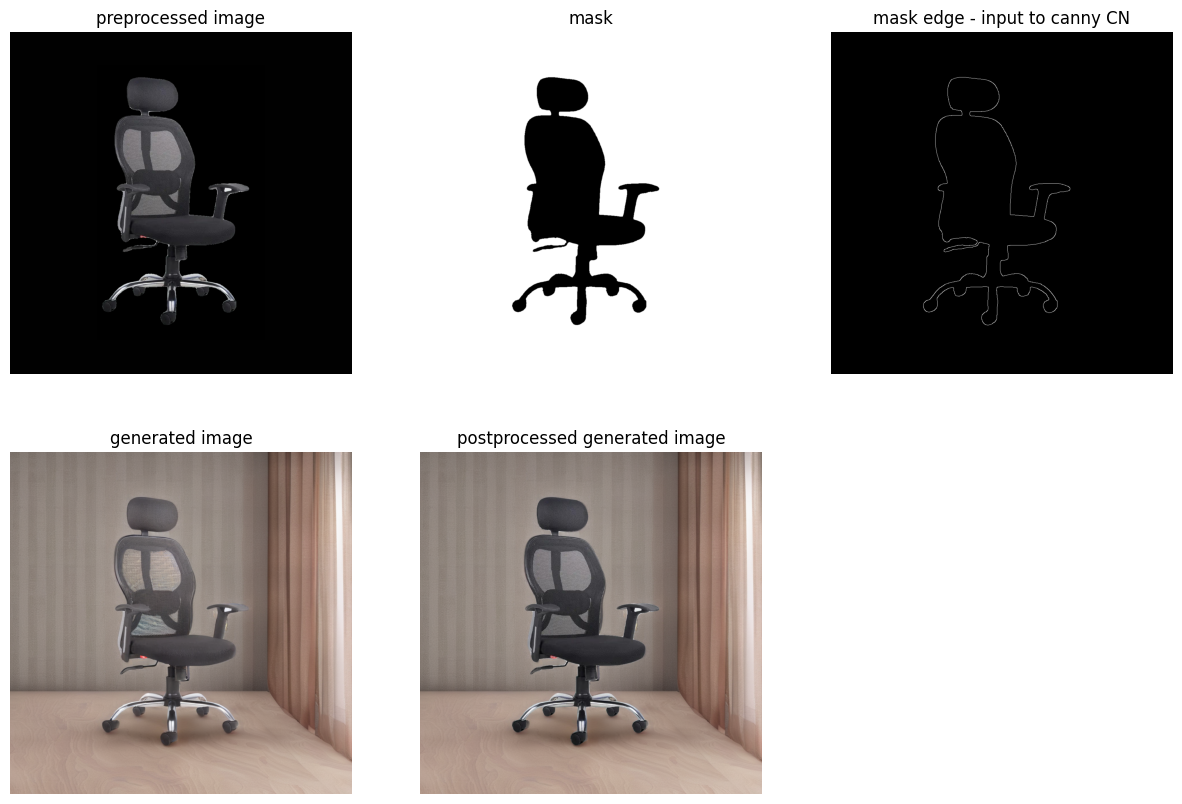

In [121]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(np.array(k[4]).astype(np.uint8))
plt.axis('off')
plt.title('preprocessed image')

plt.subplot(2, 3, 2)
plt.imshow(k[5], cmap='gray')
plt.axis('off')
plt.title('mask')

plt.subplot(2, 3, 3)
plt.imshow(k[6], cmap='gray')
plt.axis('off')
plt.title('mask edge - input to canny CN')

plt.subplot(2, 3, 4)
plt.imshow(k[1][0])
plt.axis('off')
plt.title('generated image')

plt.subplot(2, 3, 5)
plt.imshow(k[0][0])
plt.axis('off')
plt.title('postprocessed generated image')

In [116]:
image = Image.fromarray(images[3])
k = bggenerator.generate(prompt='living room, curtains, commercial photography, professional, photorealistic', 
               image=image, height=1024, width=1024)


0: 448x640 1 couch, 71.3ms
Speed: 3.8ms preprocess, 71.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
['couch, living room, curtains, commercial photography, professional, photorealistic', None, 20, 0.3, 1024, 1024, 1, 7.0, 1.0]


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'postprocessed generated image')

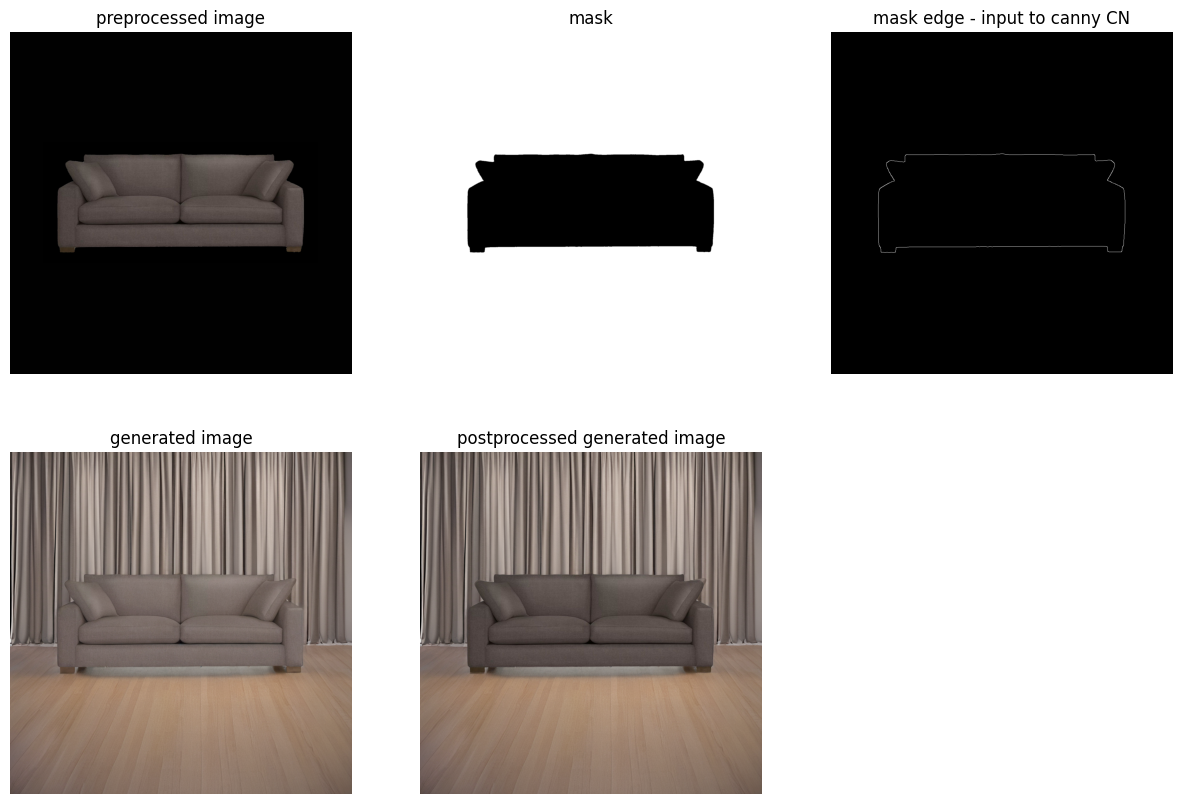

In [117]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(np.array(k[4]).astype(np.uint8))
plt.axis('off')
plt.title('preprocessed image')

plt.subplot(2, 3, 2)
plt.imshow(k[5], cmap='gray')
plt.axis('off')
plt.title('mask')

plt.subplot(2, 3, 3)
plt.imshow(k[6], cmap='gray')
plt.axis('off')
plt.title('mask edge - input to canny CN')

plt.subplot(2, 3, 4)
plt.imshow(k[1][0])
plt.axis('off')
plt.title('generated image')

plt.subplot(2, 3, 5)
plt.imshow(k[0][0])
plt.axis('off')
plt.title('postprocessed generated image')

In [109]:
image = Image.fromarray(images[4])
k = bggenerator.generate(prompt='studio lighting, minimalist, commercial photography, professional, photorealistic', 
               image=image, height=1024, width=1024)


0: 640x512 1 suitcase, 74.9ms
Speed: 3.7ms preprocess, 74.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)
['suitcase, studio lighting, minimalist, commercial photography, professional, photorealistic', None, 20, 0.3, 1024, 1024, 1, 7.0, 1.0]


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'postprocessed generated image')

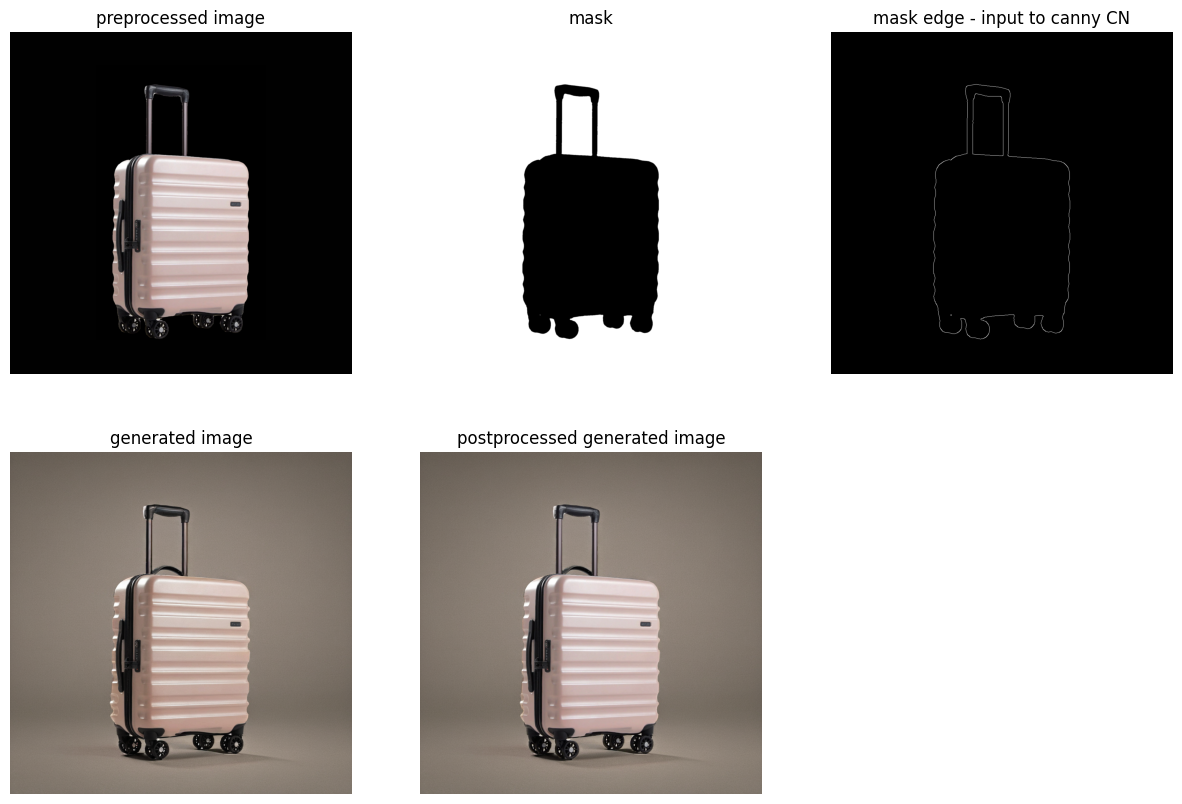

In [110]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(np.array(k[4]).astype(np.uint8))
plt.axis('off')
plt.title('preprocessed image')

plt.subplot(2, 3, 2)
plt.imshow(k[5], cmap='gray')
plt.axis('off')
plt.title('mask')

plt.subplot(2, 3, 3)
plt.imshow(k[6], cmap='gray')
plt.axis('off')
plt.title('mask edge - input to canny CN')

plt.subplot(2, 3, 4)
plt.imshow(k[1][0])
plt.axis('off')
plt.title('generated image')

plt.subplot(2, 3, 5)
plt.imshow(k[0][0])
plt.axis('off')
plt.title('postprocessed generated image')

In [102]:
image = Image.fromarray(images[0])
k = bggenerator.generate(prompt='room, floor, commercial photography, professional, photorealistic', 
               image=image, height=1024, width=1024)

k


0: 512x640 1 apple, 74.3ms
Speed: 2.3ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


[None, None, None, None, None, None, None]